# Movie Rating Classification using MLPClassifier, Logistic Regression, and Naive Bayes

In [4]:
#Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, 
    accuracy_score, precision_score, recall_score, 
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize


In [6]:
#Load Dataset
df = pd.read_csv('movie_ratings_dataset.csv')
print(df.shape)
df.head()


(1200, 12)


,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.80,134.63,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.27,220.47,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.23,52.79,160.0,2010.0,2.0,NaN,NaN,43.0,6.16,No,Excellent
3,Action,8.17,86.41,153.0,2022.0,4.0,5.21,NaN,7.0,2.99,No,Good
4,Romance,6.40,259.57,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent


In [7]:
#Data Preprocessing
target_col = 'Rating_Category'
X = df.drop(columns=[target_col])
y = df[target_col]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


In [8]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)


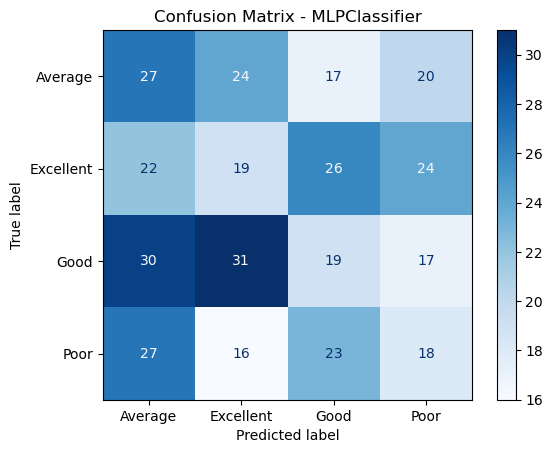

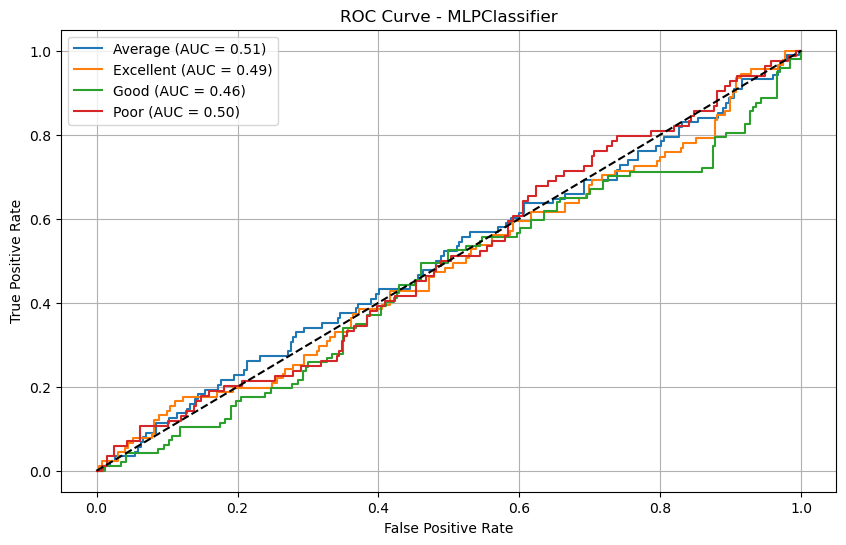

In [18]:
#MLPClassifier
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
])
clf.fit(X_train, y_train)
y_pred_mlp = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - MLPClassifier")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = clf.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLPClassifier')
plt.legend()
plt.grid(True)
plt.show()


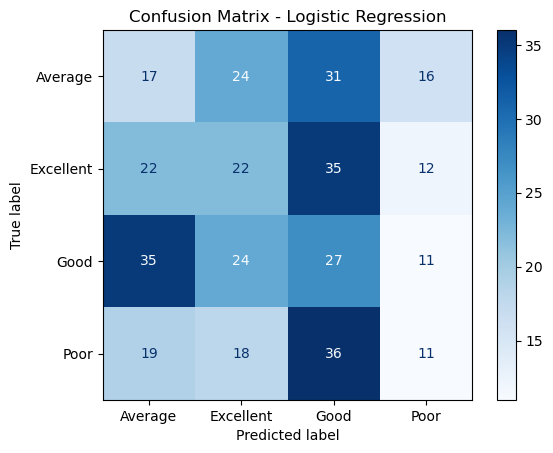

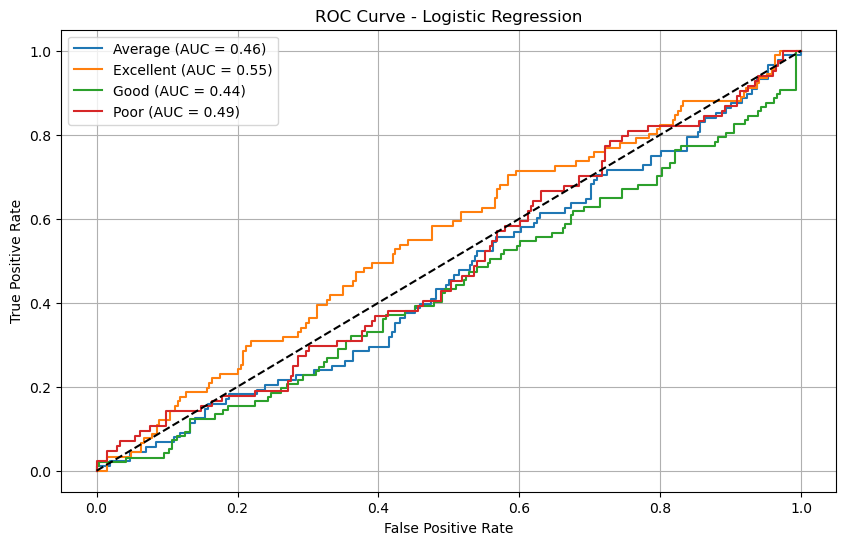

In [23]:
#Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=300, random_state=42))
])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=label_encoder.classes_)
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
y_score_lr = lr_pipeline.predict_proba(X_test)
plt.figure(figsize=(10, 6))
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score_lr[:, i])
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


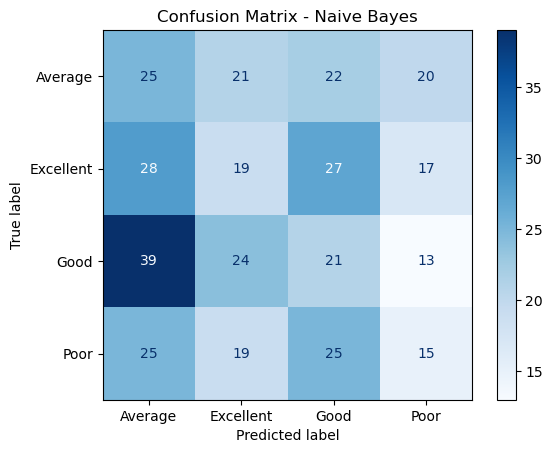

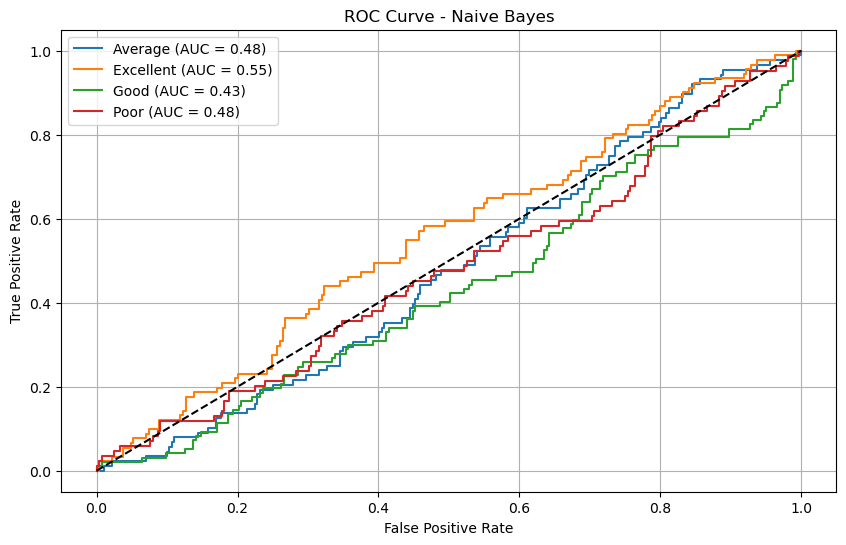

In [20]:
#Naive Bayes
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])
nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=label_encoder.classes_)
disp_nb.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# ROC Curve
y_score_nb = nb_pipeline.predict_proba(X_test)
plt.figure(figsize=(10, 6))
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_nb[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score_nb[:, i])
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# === Feature Encoding, Transformation, and Evaluation Fix ===
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv('/mnt/data/movie_ratings_dataset.csv')
X = df.drop('Rating_Category', axis=1)
y = df['Rating_Category']

# Encode target labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Transform features
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# === Model Baselines ===
# 1. Majority class baseline
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_trans, y_train)
print("DummyClassifier accuracy:", dummy.score(X_test_trans, y_test))

# 2. Decision Tree baseline
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_trans, y_train)
print("DecisionTree accuracy:", dt.score(X_test_trans, y_test))
print("DecisionTree classification report:")
print(classification_report(y_test, dt.predict(X_test_trans), target_names=le.classes_))

# === Cross-Validation ===
X_all_trans = preprocessor.fit_transform(X)
cv_scores = cross_val_score(dt, X_all_trans, y_enc, cv=5)
print("DecisionTree CV scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


In [ ]:

# 📊 Final Comparison Charts (Updated with Decision Tree)

# Predict with Decision Tree
y_pred_dt = dt_clf.predict(X_test)

comparison_results = {
    "Model": ["MLPClassifier", "Logistic Regression", "Naive Bayes", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision (macro)": [
        precision_score(y_test, y_pred_mlp, average='macro'),
        precision_score(y_test, y_pred_lr, average='macro'),
        precision_score(y_test, y_pred_nb, average='macro'),
        precision_score(y_test, y_pred_dt, average='macro')
    ],
    "Recall (macro)": [
        recall_score(y_test, y_pred_mlp, average='macro'),
        recall_score(y_test, y_pred_lr, average='macro'),
        recall_score(y_test, y_pred_nb, average='macro'),
        recall_score(y_test, y_pred_dt, average='macro')
    ]
}

comparison_df = pd.DataFrame(comparison_results)

# Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.ylim(0, 1)
plt.title("Accuracy Comparison of Models")
plt.grid(True, axis='y')
plt.show()

# Precision and Recall
x = np.arange(len(comparison_df["Model"]))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, comparison_df["Precision (macro)"], width, label='Precision')
ax.bar(x + width/2, comparison_df["Recall (macro)"], width, label='Recall')

ax.set_ylabel('Score')
ax.set_title('Precision and Recall by Model')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df["Model"])
ax.set_ylim(0, 1)
ax.legend()
plt.grid(True, axis='y')
plt.show()
